In [1]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import seaborn as sns
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/models/acc_19_0.72875.h5')

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/emotion_2000.zip'

-rw------- 1 root root 2260193036 Nov 10 00:52 '/content/drive/My Drive/Colab Notebooks/datasets/emotion_2000.zip'


In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/emotion_2000.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-020.jpg  
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-023.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-007.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-010.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_교통&이동수단(엘리베이터 포함)_20201204102418-002-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_dir = 'validation'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 16,
                 class_mode = 'categorical',
                 shuffle = False)

Found 4800 images belonging to 6 classes.


In [8]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 300)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

300/300 [==============================] - 114s 279ms/step - loss: 0.8383 - accuracy: 0.7287
Loss = 0.83835
Accuracy = 0.72875


In [9]:
test_generator.reset()

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#test_generator.reset()

# Y_pred = model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
               precision    recall  f1-score   support

        anger       0.65      0.71      0.68       800
embarrassment       0.70      0.72      0.71       800
        happy       0.92      0.93      0.93       800
   neutrality       0.75      0.89      0.81       800
          sad       0.80      0.71      0.75       800
       unrest       0.52      0.41      0.46       800

     accuracy                           0.73      4800
    macro avg       0.72      0.73      0.72      4800
 weighted avg       0.72      0.73      0.72      4800



In [11]:
import pandas as pd

In [12]:
cm = confusion_matrix(test_generator.classes, y_pred)
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']

cm_df = pd.DataFrame(cm, index = label,
                     columns = label
                    )

cm_df

,anger,embarrassment,happy,neutrality,sad,unrest
anger,570,45,29,39,31,86
embarrassment,60,575,6,57,7,95
happy,14,13,747,7,7,12
neutrality,30,12,6,708,16,28
sad,73,19,16,40,570,82
unrest,126,160,10,92,84,328


In [14]:
cm_df.to_csv('/content/drive/MyDrive/Colab Notebooks/project/resnet16_confusion_matrix.csv')

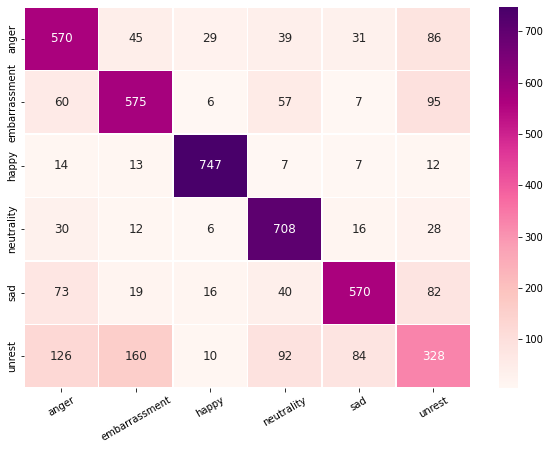

In [15]:
import seaborn as sns

cm = confusion_matrix(test_generator.classes, y_pred)
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
plt.figure(figsize=(10,7))
sns.heatmap(cm, xticklabels=label, yticklabels=label,annot=True, annot_kws={"size": 12}, cmap='RdPu',fmt="g", linewidths = 0.5)
plt.xticks(rotation = 30 )
#plt.xlabel('Predicted label', fontsize=20)
#plt.ylabel('True Label', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project/confusion_matrix.jpg')


```
anger를 ['embarrassment', 'happy', 'neutrality', 'sad', 'unrest']라고 예측한 경우
[47, 36, 57, 57, 124]
```       

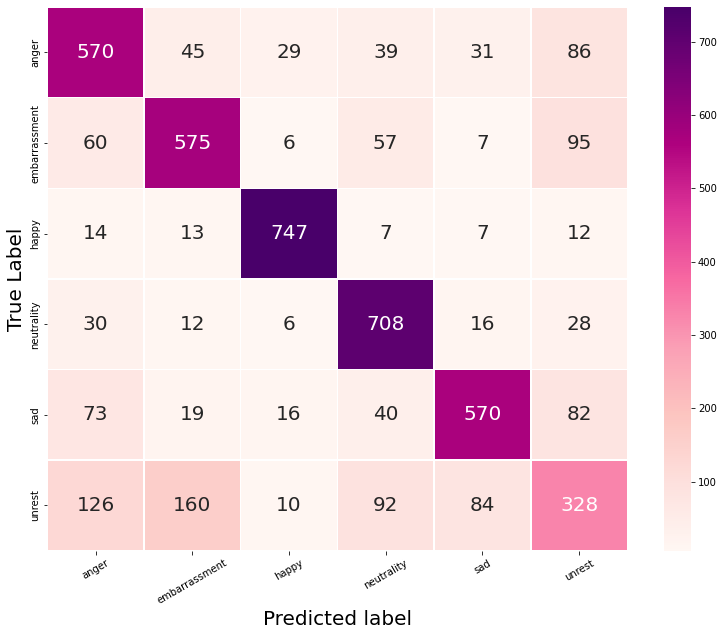

In [16]:
import seaborn as sns

cm = confusion_matrix(test_generator.classes, y_pred)
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
plt.figure(figsize=(13,10))
sns.heatmap(cm, xticklabels=label, yticklabels=label,annot=True, annot_kws={"size": 20}, cmap='RdPu',fmt="g", linewidths = 0.5)
plt.xticks(rotation = 30 )
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project/confusion_matrix2.jpg')


In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
plot = plot_confusion_matrix(model, # 분류 모델
                             test_generator.classes, y_pred, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.rainbow, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             Normalize=True) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')
#plt.savefig('/home/lab02/confusion_matrix.jpg')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored